In [19]:
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

In [20]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [21]:
#English_Audio_Dataset About/1_sec_cbn_eng_about_2.wav
#Kannada_Audio_Dataset Avanu/1_sec_cbn_kan_avanu_1.wav
train_audio_path = '/media/m_snehith_reddy/Spider-Man/8th_Sem/Final_Year_Project/ALL_Audio_Video_Eng_Kan_same_place/1_sec_kan_audio_datasets_New_five/trainf/'
filename = 'howdu/1.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)
# fig = plt.figure(figsize=(14, 8))
# ax1 = fig.add_subplot(211)
# ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
# ax1.set_xlabel('time')
# ax1.set_ylabel('Amplitude')
#ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)
print(sample_rate)
print(len(samples))

16000
16725


In [22]:
ipd.Audio(samples, rate=sample_rate)
print(sample_rate)
np.array(samples, dtype='float64')

16000


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [23]:
samples=np.array(samples, dtype='float64')

samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

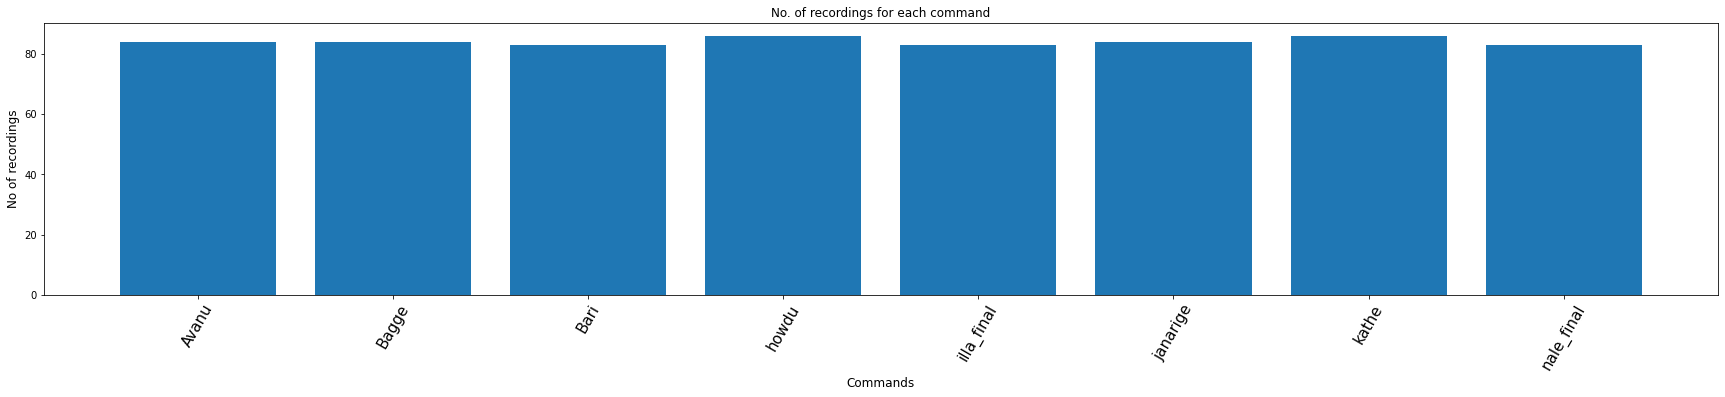

In [24]:
labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

(array([  1.,   0.,   0., 671.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.024 , 1.0304, 1.0368, 1.0432, 1.0496, 1.056 , 1.0624, 1.0688,
        1.0752, 1.0816, 1.088 ]),
 <BarContainer object of 10 artists>)

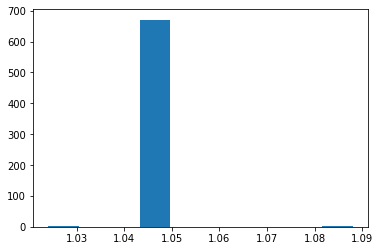

In [25]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [26]:
all_wave = []
all_label = []
dct = dict()
c=0
b=0
for label in labels:
    print(label)
    
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
#         samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
#         samples = librosa.resample(samples, sample_rate, 8000)
#         #print(len(samples))
#         dct[len(samples)] = dct.get(len(samples),0) + 1
#         b+=1
#         if(len(samples)== 8363):
            
#             c+=1
#             all_wave.append(samples)
#             all_label.append(label)
        X, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        stft = np.abs(librosa.stft(X))
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
        feature_array = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
        feature_vector  = np.around(feature_array,decimals=3)
        all_wave.append(feature_vector)
        all_label.append(label)
#print(dct)
print(dict(sorted(dct.items(), key=lambda item: item[1])))
print("len = ", len(dct))
print("c = ",c,b)

Avanu
Bagge
Bari
howdu
illa_final
janarige
kathe
nale_final
{}
len =  0
c =  0 0


In [27]:
print(len(all_wave))

673


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [29]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [30]:
#all_wave = np.array(all_wave).reshape(-1,8363,1)

all_wave = np.array(all_wave).reshape(-1,193,)

In [31]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.3,train_size=0.7,random_state=777,shuffle=True)

In [32]:
y_val1 = list()
for i in y_val:
    count = 0
    for j in i:
        if( j == 1):
            y_val1.append(count);
        count +=1;

y_tr1 = list()
for i in y_tr:
    count = 0
    for j in i:
        if( j == 1):
            y_tr1.append(count);
        count +=1;

dct = dict()
for i in y_val1:
    dct[i] = dct.get(i,0) + 1
print(dict(sorted(dct.items(), key=lambda item: item[1])))

print("y_tr1 rows, cols =", len(y_tr1))
print("y_val1 rows, cols =", len(y_val1))
print("x_tr rows, cols =", len(x_tr), len(x_tr[0]))
print("x_val rows, cols =", len(x_val), len(x_val[0]))

# print("y_val1 =",y_val1)
x_train_dup = x_tr
y_train_dup = y_tr1

x_val_dup = x_val
y_val_dup = y_val1

# x_train_list = list(list())
# for i in range(0,len(x_tr)):
#     tmp = list()
#     for j in range(0,len(x_tr[i])):
#         tmp.append(x_tr[i][j])
#     x_train_list.append(tmp)
    
# print(x_train_list)
# print(x_tr)



dct = dict()
for i in range(0,9):
    count = 0
    tmp = list()
    for j in range(0, len(y_val1)):
        if(y_val1[j] == i):
            count +=1;
        if(count > 21 and y_val1[j] == i):
            x_train_dup = np.vstack([x_train_dup, x_val_dup[j]])
            y_train_dup = np.append(y_train_dup, y_val1[j])
            
            tmp.append(j)
    dct[i] = tmp

# print(len(x_train_dup), len(x_tr), len(y_train_dup), len(y_tr1))
# print(len(x_val_dup), len(x_val), len(y_val_dup), len(y_val1))
# #print(dct)
#print(dct.values())
index_list = list()
for i in dct.values():
    for j in i:
        index_list.append(j)
index_list.sort(reverse=True)
print(index_list)
for i in index_list:
    x_val_dup = np.delete(x_val_dup, (i), axis=0)
    y_val1.pop(i)
print(len(x_train_dup), len(x_tr), len(y_train_dup), len(y_tr1))
print(len(x_val_dup), len(x_val), len(y_val_dup), len(y_val1))





from keras.utils import np_utils, generic_utils

y_train_dup, y_val_dup = [np_utils.to_categorical(x) for x in (y_train_dup, y_val_dup)]

{5: 25, 0: 25, 7: 25, 1: 25, 2: 25, 4: 25, 3: 26, 6: 26}
y_tr1 rows, cols = 471
y_val1 rows, cols = 202
x_tr rows, cols = 471 193
x_val rows, cols = 202 193
[201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 181, 180, 179, 178, 175, 173, 172, 171, 170, 167, 166, 165, 161, 153, 150]
505 471 505 471
168 202 168 168


In [43]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D, BatchNormalization, Bidirectional
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

# from keras.layers.core import Activation, Dropout, Dense
# from keras.layers import Flatten, LSTM

# model = Sequential()
# model.add(Dense(units=256, activation='relu', input_shape=(193,)))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation="relu"))
# model.add(Dense(64, activation="relu"))
# model.add(Dense(9, activation='softmax'))
# model.summary()

inputs = Input(shape=(193,1))

# #First Conv1D layer
# conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
# conv = MaxPooling1D(3)(conv)
# conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
# # conv = Dropout(0.3)(conv)

# #Second Conv1D layer
# conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
# # conv = Dropout(0.3)(conv)

# # #Third Conv1D layer
# # conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
# # conv = MaxPooling1D(3)(conv)
# # conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
# # conv = Dropout(0.3)(conv)

# # #Fourth Conv1D layer
# # conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
# # conv = MaxPooling1D(3)(conv)
# # conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
# # conv = Dropout(0.3)(conv)



# #Flatten layer
# conv = Flatten()(conv)

# #Dense Layer 1
# conv = Dense(256, activation='relu')(conv)
# conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
# # conv = Dropout(0.3)(conv)

# # #Dense Layer 2
# # conv = Dense(512, activation='relu')(conv)
# # conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
# # # conv = Dropout(0.3)(conv)

# # #Dense Layer 3
# # conv = Dense(1024, activation='relu')(conv)
# # conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
# # # conv = Dropout(0.3)(conv)

# # #Dense Layer 4
# # conv = Dense(1024, activation='relu')(conv)
# # conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
# # # conv = Dropout(0.3)(conv)

# outputs = Dense(len(labels), activation='softmax')(conv)

# model = Model(inputs, outputs)
# model.summary()









conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)
conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
conv = Flatten()(conv)
x = Dense(units=1024, activation='relu')(conv)
x1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(x)
x1 = Dropout(0.3)(x1)
x1 = Dense(512, activation='relu')(x1)
x1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(x1)
# x1 = Dropout(0.3)(x1)
x1 = Dense(8, activation='relu')(x1)

outputs = Dense(len(labels), activation='softmax')(x1)

model = Model(inputs, outputs)
model.summary()












# #First Conv1D layer
# conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
# conv = MaxPooling1D(3)(conv)
# # conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
# conv = Dropout(0.2)(conv)

# #Second Conv1D layer
# conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# # conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
# conv = Dropout(0.2)(conv)

# #Third Conv1D layer
# conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# # conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
# conv = Dropout(0.2)(conv)

# #Fourth Conv1D layer
# conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# # conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
# conv = Dropout(0.2)(conv)


# #Flatten layer
# conv = Flatten()(conv)

# #Dense Layer 1
# conv = Dense(1024, activation='relu')(conv)
# conv = Dropout(0.2)(conv)

# #Dense Layer 2
# conv = Dense(1024, activation='relu')(conv)
# conv = Dropout(0.2)(conv)

# # #Dense Layer 2
# # conv = Dense(32, activation='relu')(conv)
# # conv = Dropout(0.3)(conv)

# # #Dense Layer 2
# # conv = Dense(64, activation='relu')(conv)
# # conv = Dropout(0.3)(conv)

# outputs = Dense(len(labels), activation='softmax')(conv)

# model = Model(inputs, outputs)
# model.summary()


# #First Conv1D layer
# conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.3)(conv)

# #Second Conv1D layer
# conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.3)(conv)

# #Third Conv1D layer
# conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.3)(conv)

# #Fourth Conv1D layer
# conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.3)(conv)

# #Flatten layer
# conv = Flatten()(conv)

# #Dense Layer 1
# conv = Dense(512, activation='relu')(conv)
# conv = Dropout(0.3)(conv)

# #Dense Layer 2
# conv = Dense(128, activation='relu')(conv)
# conv = Dropout(0.3)(conv)

# #Dense Layer 2
# conv = Dense(64, activation='relu')(conv)
# conv = Dropout(0.3)(conv)

# outputs = Dense(len(labels), activation='softmax')(conv)

# model = Model(inputs, outputs)
# model.summary()


# #First Conv1D layer
# conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.2)(conv)

# #Second Conv1D layer
# conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.2)(conv)

# #Third Conv1D layer
# conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.2)(conv)

# #Fourth Conv1D layer
# conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.2)(conv)

# #Flatten layer
# conv = Flatten()(conv)

# #Dense Layer 1
# conv = Dense(256, activation='relu')(conv)
# conv = Dropout(0.2)(conv)

# #Dense Layer 2
# conv = Dense(128, activation='relu')(conv)
# conv = Dropout(0.2)(conv)

# outputs = Dense(len(labels), activation='softmax')(conv)

# model = Model(inputs, outputs)
# model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 193, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 181, 8)            112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 60, 8)             0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 8)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 8)             32        
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              492544

In [44]:
import keras
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',optimizer= 'adam',metrics=['accuracy'])

In [45]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [46]:
history=model.fit(x_train_dup, y_train_dup ,epochs=200, batch_size=32, validation_data=(x_val_dup,y_val_dup))

Epoch 1/200
16/16 [==============================] - 1s 26ms/step - loss: 2.3122 - accuracy: 0.1789 - val_loss: 3.0609 - val_accuracy: 0.1905
Epoch 2/200
16/16 [==============================] - 0s 14ms/step - loss: 2.0129 - accuracy: 0.1855 - val_loss: 3.1166 - val_accuracy: 0.1548
Epoch 3/200
16/16 [==============================] - 0s 14ms/step - loss: 1.8777 - accuracy: 0.2680 - val_loss: 2.6746 - val_accuracy: 0.2202
Epoch 4/200
16/16 [==============================] - 0s 14ms/step - loss: 1.6918 - accuracy: 0.3975 - val_loss: 2.0219 - val_accuracy: 0.3095
Epoch 5/200
16/16 [==============================] - 0s 14ms/step - loss: 1.6135 - accuracy: 0.3522 - val_loss: 1.6010 - val_accuracy: 0.3393
Epoch 6/200
16/16 [==============================] - 0s 14ms/step - loss: 1.5763 - accuracy: 0.3903 - val_loss: 1.4921 - val_accuracy: 0.3750
Epoch 7/200
16/16 [==============================] - 0s 14ms/step - loss: 1.4532 - accuracy: 0.4524 - val_loss: 1.4063 - val_accuracy: 0.4167
Epoch 

16/16 [==============================] - 0s 14ms/step - loss: 0.4969 - accuracy: 0.8071 - val_loss: 0.4802 - val_accuracy: 0.8095
Epoch 59/200
16/16 [==============================] - 0s 13ms/step - loss: 0.5239 - accuracy: 0.8039 - val_loss: 0.5221 - val_accuracy: 0.8333
Epoch 60/200
16/16 [==============================] - 0s 14ms/step - loss: 0.4189 - accuracy: 0.8778 - val_loss: 0.5313 - val_accuracy: 0.7976
Epoch 61/200
16/16 [==============================] - 0s 14ms/step - loss: 0.4223 - accuracy: 0.8304 - val_loss: 0.4997 - val_accuracy: 0.7976
Epoch 62/200
16/16 [==============================] - 0s 13ms/step - loss: 0.4613 - accuracy: 0.8465 - val_loss: 0.4387 - val_accuracy: 0.8274
Epoch 63/200
16/16 [==============================] - 0s 14ms/step - loss: 0.4698 - accuracy: 0.8578 - val_loss: 0.4398 - val_accuracy: 0.8571
Epoch 64/200
16/16 [==============================] - 0s 14ms/step - loss: 0.4476 - accuracy: 0.8470 - val_loss: 0.4813 - val_accuracy: 0.8155
Epoch 65/200

16/16 [==============================] - 0s 14ms/step - loss: 0.2585 - accuracy: 0.9090 - val_loss: 0.5008 - val_accuracy: 0.8274
Epoch 116/200
16/16 [==============================] - 0s 13ms/step - loss: 0.2641 - accuracy: 0.9165 - val_loss: 0.4765 - val_accuracy: 0.8214
Epoch 117/200
16/16 [==============================] - 0s 13ms/step - loss: 0.3217 - accuracy: 0.8992 - val_loss: 0.5146 - val_accuracy: 0.8214
Epoch 118/200
16/16 [==============================] - 0s 14ms/step - loss: 0.2981 - accuracy: 0.9048 - val_loss: 0.5999 - val_accuracy: 0.7917
Epoch 119/200
16/16 [==============================] - 0s 14ms/step - loss: 0.2101 - accuracy: 0.9368 - val_loss: 0.5535 - val_accuracy: 0.8155
Epoch 120/200
16/16 [==============================] - 0s 13ms/step - loss: 0.2182 - accuracy: 0.9257 - val_loss: 0.4954 - val_accuracy: 0.8095
Epoch 121/200
16/16 [==============================] - 0s 14ms/step - loss: 0.3184 - accuracy: 0.8597 - val_loss: 0.4646 - val_accuracy: 0.8333
Epoch 

Epoch 172/200
16/16 [==============================] - 0s 21ms/step - loss: 0.1716 - accuracy: 0.9382 - val_loss: 0.3481 - val_accuracy: 0.8810
Epoch 173/200
16/16 [==============================] - 0s 14ms/step - loss: 0.1819 - accuracy: 0.9295 - val_loss: 0.4356 - val_accuracy: 0.8452
Epoch 174/200
16/16 [==============================] - 0s 14ms/step - loss: 0.2071 - accuracy: 0.9461 - val_loss: 0.4205 - val_accuracy: 0.8393
Epoch 175/200
16/16 [==============================] - 0s 14ms/step - loss: 0.2075 - accuracy: 0.9230 - val_loss: 0.3975 - val_accuracy: 0.8631
Epoch 176/200
16/16 [==============================] - 0s 14ms/step - loss: 0.2697 - accuracy: 0.9249 - val_loss: 0.3926 - val_accuracy: 0.8869
Epoch 177/200
16/16 [==============================] - 0s 15ms/step - loss: 0.2406 - accuracy: 0.9056 - val_loss: 0.4142 - val_accuracy: 0.8869
Epoch 178/200
16/16 [==============================] - 0s 14ms/step - loss: 0.1431 - accuracy: 0.9618 - val_loss: 0.4357 - val_accuracy:

In [54]:
from keras.utils import plot_model
plot_model(model, to_file='AVSR_model_plot_Kannada.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


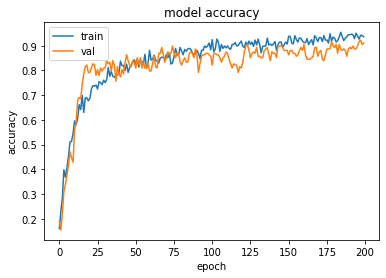

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('Audio_Kannada Model accuracy.jpg')
plt.show()

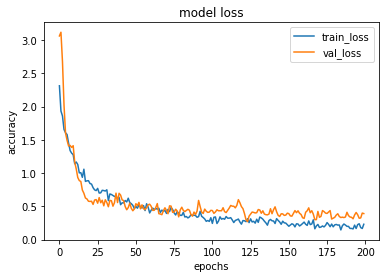

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.savefig('Audio_Kannada Model Loss.jpg')
plt.show()

In [61]:
predict_prob=model.predict(x_val_dup)
predict_classes=np.argmax(predict_prob,axis=1)
predict_classes
score, acc = model.evaluate(x_val_dup, y_val_dup)

6/6 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.9107


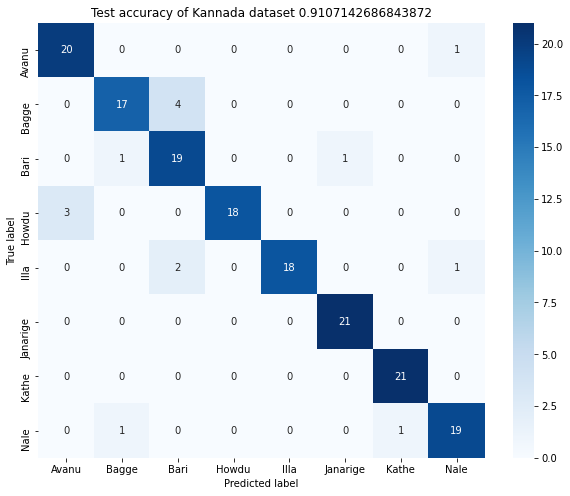

In [63]:
tmp = list()
for i in y_val_dup:
    count = 0
    for j in i:
        if( j == 1):
            tmp.append(count);
        count +=1;
# print(tmp)
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
words_list = ['Avanu','Bagge','Bari', 'Howdu','Illa', 'Janarige', 'Kathe', 'Nale']
lb_make = LabelEncoder()
y_pred = lb_make.fit_transform(predict_classes)
Y_Test = lb_make.fit_transform(tmp)
cm = confusion_matrix(Y_Test, y_pred)
cm_df = pd.DataFrame(cm,index =words_list,columns = words_list)
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, cmap="Blues")
plt.title('Test accuracy of Kannada dataset {}'.format(acc))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('Audio_Kannada Confusion Matrix.jpg')
plt.show()

In [64]:
from sklearn.metrics import classification_report
y_pred = lb_make.fit_transform(predict_classes)
Y_Test = lb_make.fit_transform(Y_Test)
print(classification_report(Y_Test, y_pred, target_names=words_list))

              precision    recall  f1-score   support

       Avanu       0.87      0.95      0.91        21
       Bagge       0.89      0.81      0.85        21
        Bari       0.76      0.90      0.83        21
       Howdu       1.00      0.86      0.92        21
        Illa       1.00      0.86      0.92        21
    Janarige       0.95      1.00      0.98        21
       Kathe       0.95      1.00      0.98        21
        Nale       0.90      0.90      0.90        21

    accuracy                           0.91       168
   macro avg       0.92      0.91      0.91       168
weighted avg       0.92      0.91      0.91       168



In [134]:
model.save('audio_english_v1.h5')

In [22]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8363,1))
    index=np.argmax(prob[0])
    return classes[index]

In [25]:
filepath='/media/m_snehith_reddy/Spider-Man/8th_Sem/Final_Year_Project/Testing/1_sec_cbn_kan_avanu_1.wav'

#reading the voice commands
samples, sample_rate = librosa.load(filepath, sr = 16000)
print(len(samples))
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=len(samples))  

predict(samples)

16725


'Avanu'

In [ ]:
import sounddevice as sd
samplerate = 16725
# the value below must be in seconds  
duration = 1.045
filename = 'recorded_audio.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,
    channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)

In [382]:
print(history)